# Building Model with Deep Learning (LSTM)

   - Building a Long Short-Term Memory (LSTM) model for sales prediction, particularly focusing on time-series, data preprocessing and structuring


#### Directory setup

Allowing for imports from modules located in the parent directory 

by modifies the Python path to include the parent directory of the current working directory, 

In [1]:
import os
import sys

sys.path.insert(0,os.path.dirname(os.getcwd()))

#####  Importing the required modules and packages 

In [2]:
import pandas as pd
from scripts.data_accessing import DataAccessor
from scripts.data_preprocessing import DataProcess
from scripts.sklean_model import Model
from scripts.LSTM_time_series import LSTMModel

In [3]:
# Path to the data sets

data_path_sample="../Data/sample_submission.csv"
data_path_store="../Data/store.csv"
data_path_train="../Data/train.csv"
data_path_test="../Data/test.csv"

##### Reading data

In [4]:
sampleData=DataAccessor(data_path_sample)
storeData=DataAccessor(data_path_store)
trainData=DataAccessor(data_path_train)
testData=DataAccessor(data_path_test)

In [5]:
# Accessing Data

df_sample=sampleData.read_data()
df_store=storeData.read_data()
df_train=trainData.read_data()
df_test=testData.read_data()

INFO:root:Dataset loaded successfully
INFO:root:Dataset loaded successfully
d:\10Academy\Week4\scripts\data_accessing.py:34: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.data_path)
INFO:root:Dataset loaded successfully
INFO:root:Dataset loaded successfully


#### Data Preprocessing and Structuring Implementation
 - preprocessing for the train and test datasets.

In [6]:
processing=DataProcess()

store,train,test=processing.merging_store(df_store,df_train,df_test)

In [7]:
train,test, preprocessor=processing.feature_engineering(train, test)
df=train

In [8]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Day,WeekOfYear,is_weekend,CompetitionOpenTime,Promo2OpenTime
0,1.0,5.0,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0,c,...,0.0,0.0,None,7.0,2015.0,31.0,31.0,0.0,82.0,24187.75
1,2.0,5.0,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0,a,...,13.0,2010.0,"Jan,Apr,Jul,Oct",7.0,2015.0,31.0,31.0,0.0,92.0,64.50
2,3.0,5.0,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",7.0,2015.0,31.0,31.0,0.0,103.0,52.25
3,4.0,5.0,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0,c,...,0.0,0.0,None,7.0,2015.0,31.0,31.0,0.0,70.0,24187.75
4,5.0,5.0,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0,a,...,0.0,0.0,None,7.0,2015.0,31.0,31.0,0.0,3.0,24187.75


In [9]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Month', 'Year', 'Day',
       'WeekOfYear', 'is_weekend', 'CompetitionOpenTime', 'Promo2OpenTime'],
      dtype='object')

In [10]:
lstModel=LSTMModel()

In [11]:
df=lstModel.date_conversion(df)

In [12]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Month', 'Year', 'Day',
       'WeekOfYear', 'is_weekend', 'CompetitionOpenTime', 'Promo2OpenTime'],
      dtype='object')

In [13]:
scaled_data=lstModel.scale_data(df)

In [14]:
scaled_data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Day,WeekOfYear,is_weekend,CompetitionOpenTime,Promo2OpenTime
1017204,746.0,5.0,2015-07-31,0.218575,0.086356,1.0,1.0,0,1.0,d,...,35.0,2011.0,"Mar,Jun,Sept,Dec",7.0,2015.0,31.0,31.0,0.0,0.003468,0.001943
1017205,747.0,5.0,2015-07-31,0.257707,0.111803,1.0,1.0,0,1.0,c,...,0.0,0.0,None,7.0,2015.0,31.0,31.0,0.0,0.004707,1.000000
1017206,748.0,5.0,2015-07-31,0.180044,0.078235,1.0,1.0,0,1.0,d,...,14.0,2011.0,"Jan,Apr,Jul,Oct",7.0,2015.0,31.0,31.0,0.0,0.003923,0.002160
1017207,742.0,5.0,2015-07-31,0.251739,0.137520,1.0,1.0,0,1.0,d,...,0.0,0.0,None,7.0,2015.0,31.0,31.0,0.0,1.000000,1.000000
1017208,1.0,5.0,2015-07-31,0.126664,0.075122,1.0,1.0,0,1.0,c,...,0.0,0.0,None,7.0,2015.0,31.0,31.0,0.0,0.004666,1.000000


In [15]:
scaled_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Month', 'Year', 'Day',
       'WeekOfYear', 'is_weekend', 'CompetitionOpenTime', 'Promo2OpenTime'],
      dtype='object')

In [16]:
df=lstModel.managinig_data_types(scaled_data)

In [17]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Month', 'Year', 'Day', 'WeekOfYear', 'is_weekend',
       'CompetitionOpenTime', 'Promo2OpenTime', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec',
       'PromoInterval_None'],
      dtype='object')

In [18]:
df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
SchoolHoliday                     0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
Month                             0
Year                              0
Day                               0
WeekOfYear                        0
is_weekend                        0
CompetitionOpenTime               0
Promo2OpenTime                    0
StoreType_a                       0
StoreType_b                       0
StoreType_c                       0
StoreType_d                       0
Assortment_a                      0
Assortment_b                      0
Assortment_c                

In [19]:
# Fill missing values
df.fillna(0, inplace=True)  # or other imputation methods


In [20]:
Sales_values=df[['Sales']].values

In [21]:
# Assuming 'Sales' is the first column
n_lag = 7  # Number of past days to use as input
# X, y = create_sequences(, n_lag)

In [22]:
X,y=lstModel.create_sequences(Sales_values,n_lag)

In [23]:
X.shape

(1017202, 7, 1)

In [24]:
y.shape

(1017202,)

In [25]:
X.shape

(1017202, 7, 1)

In [26]:
y.shape

(1017202,)

In [27]:
X_train, y_train,X_test,y_test=lstModel.splite_data(X,y)

Training data shape: (813761, 7, 1) (813761,)
Testing data shape: (203441, 7, 1) (203441,)


In [28]:
X_train.shape

(813761, 7, 1)

In [29]:
# Train the model
# history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

In [30]:
n_feature=1 # since only to predict sales
model=lstModel.build_lstm_model(n_lag,1)

d:\10Academy\Week4\week4\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 2/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 90s 4ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 3/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 104s 4ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 4/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 111s 4ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 5/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 102s 4ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 6/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 91s 4ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 7/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 89s 3ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 8/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 96s 4ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 9/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 110s 4ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 10/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 110s 4ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 11/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 110s 4ms/step - loss: 0.0037 - val_loss

##### Saving and Loading LSTM Model in TensorFlow/Keras

In TensorFlow/Keras, you can easily save and load your LSTM model using `model.save()` and `load_model()`.

#### Saving the Model
After training the model, both the architecture and the weights can be saved:
```python
# Save the entire model
model.save('lstm_model.h5')

In [35]:
# Save the entire model after training
model.save('../result/lstm_model.h5')

##### Saving the Model in TensorFlow/Keras store the following components

- The **model architecture**: This includes the structure of the neural network.
- The **weights** of the model: These are the learned parameters from training.
- The **optimizer’s state**: This includes information like learning rate and momentum.
- The **training configuration**: It stores any specific configurations used during training (loss function, metrics, etc.).


##### Loading the Model

In [36]:
from tensorflow.keras.models import load_model

# Load the saved model
saved_model = load_model('../result/lstm_model.h5')

# Now you can use the model to make predictions or continue training
y_pred_sMode = saved_model.predict(X_test)


6358/6358 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


In [37]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


6358/6358 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0036
Test Loss: 0.003661173628643155


In [38]:
# Predict next sales
y_pred = model.predict(X_test)

6358/6358 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


In [39]:
y_pred

array([[0.23431604],
       [0.19869927],
       [0.13674496],
       ...,
       [0.24746485],
       [0.1864742 ],
       [0.20883095]], dtype=float32)

In [40]:
y_pred_sMode

array([[0.23431604],
       [0.19869927],
       [0.13674496],
       ...,
       [0.24746485],
       [0.1864742 ],
       [0.20883095]], dtype=float32)

In [41]:
y_test

array([0.22914009, 0.3258646 , 0.20668576, ..., 0.1800438 , 0.25173883,
       0.12666362])

In [67]:
y_pred

array([[0.19694951],
       [0.20631823],
       [0.14737637],
       ...,
       [0.19809118],
       [0.18861899],
       [0.20706472]], dtype=float32)

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
data=lstModel.date_conversion(train)


In [51]:
data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Day,WeekOfYear,is_weekend,CompetitionOpenTime,Promo2OpenTime
1017204,746.0,5.0,2015-07-31,9082.0,638.0,1.0,1.0,0,1.0,d,...,35.0,2011.0,"Mar,Jun,Sept,Dec",7.0,2015.0,31.0,31.0,0.0,53.0,47.00
1017205,747.0,5.0,2015-07-31,10708.0,826.0,1.0,1.0,0,1.0,c,...,0.0,0.0,None,7.0,2015.0,31.0,31.0,0.0,83.0,24187.75
1017206,748.0,5.0,2015-07-31,7481.0,578.0,1.0,1.0,0,1.0,d,...,14.0,2011.0,"Jan,Apr,Jul,Oct",7.0,2015.0,31.0,31.0,0.0,64.0,52.25
1017207,742.0,5.0,2015-07-31,10460.0,1016.0,1.0,1.0,0,1.0,d,...,0.0,0.0,None,7.0,2015.0,31.0,31.0,0.0,24187.0,24187.75
1017208,1.0,5.0,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0,c,...,0.0,0.0,None,7.0,2015.0,31.0,31.0,0.0,82.0,24187.75


In [52]:
columns_to_scale = ['Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenTime', 'Promo2OpenTime']
scaler = MinMaxScaler(feature_range=(0, 1))
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [53]:
data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Day,WeekOfYear,is_weekend,CompetitionOpenTime,Promo2OpenTime
1017204,746.0,5.0,2015-07-31,0.218575,0.086356,1.0,1.0,0,1.0,d,...,35.0,2011.0,"Mar,Jun,Sept,Dec",7.0,2015.0,31.0,31.0,0.0,0.003468,0.001943
1017205,747.0,5.0,2015-07-31,0.257707,0.111803,1.0,1.0,0,1.0,c,...,0.0,0.0,None,7.0,2015.0,31.0,31.0,0.0,0.004707,1.000000
1017206,748.0,5.0,2015-07-31,0.180044,0.078235,1.0,1.0,0,1.0,d,...,14.0,2011.0,"Jan,Apr,Jul,Oct",7.0,2015.0,31.0,31.0,0.0,0.003923,0.002160
1017207,742.0,5.0,2015-07-31,0.251739,0.137520,1.0,1.0,0,1.0,d,...,0.0,0.0,None,7.0,2015.0,31.0,31.0,0.0,1.000000,1.000000
1017208,1.0,5.0,2015-07-31,0.126664,0.075122,1.0,1.0,0,1.0,c,...,0.0,0.0,None,7.0,2015.0,31.0,31.0,0.0,0.004666,1.000000


In [56]:
import numpy as np
n_samples = y_pred.shape[0]
dummy_array_pred = np.zeros((n_samples, len(columns_to_scale)))  # Shape: (n_samples, n_features)
dummy_array_true = np.zeros((n_samples, len(columns_to_scale)))

sales_col_index = columns_to_scale.index('Sales')  # Find the index of 'Sales' in columns_to_scale
dummy_array_pred[:, sales_col_index] = y_pred.flatten()  # Assign predicted 'Sales'
dummy_array_true[:, sales_col_index] = y_test.flatten()  # Assign true 'Sales'

# applying inverse transform to the dummy array
inverse_pred = scaler.inverse_transform(dummy_array_pred)
inverse_true = scaler.inverse_transform(dummy_array_true)

# Extract the rescaled 'Sales' column from the inverse transformed data
y_pred_rescaled = inverse_pred[:, sales_col_index]
y_true_rescaled = inverse_true[:, sales_col_index]

# Print the rescaled predictions and true values

print(len(y_pred_rescaled))
print(len(y_true_rescaled))

# rescaled predictions and true values
print(y_pred_rescaled)
print(y_true_rescaled)


203441
203441
[ 9736.06561621  8256.15318987  5681.88988043 ... 10282.41200499
  7748.18965304  8677.13491333]
[ 9521. 13540.  8588. ...  7481. 10460.  5263.]


In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [59]:
mse = mean_squared_error(y_true_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true_rescaled, y_pred_rescaled)
r2 = r2_score(y_true_rescaled, y_pred_rescaled)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")


MSE: 6320971.612865534
RMSE: 2514.1542539918933
MAE: 1625.9739983699399
R-squared: 0.5768026543428934


In [43]:
import matplotlib.pyplot as plt

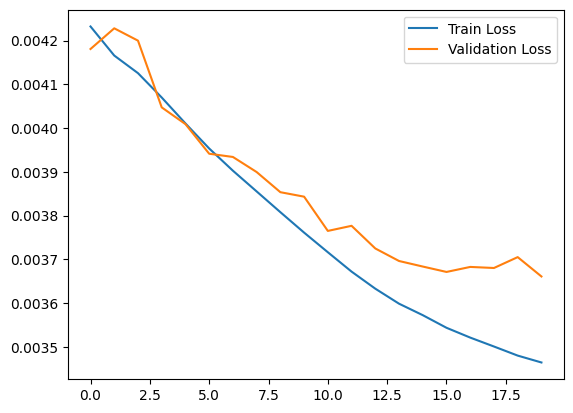

In [60]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
